In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
df = pd.read_csv(url)

df.head()
print(df["credit_risk"].unique())


[1 0]


In [5]:
print(df["credit_risk"].value_counts())


credit_risk
1    700
0    300
Name: count, dtype: int64


In [6]:
X = df.drop("credit_risk", axis=1)
y = df["credit_risk"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)


Train: (800, 20)
Test : (200, 20)


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify feature types (again, to be safe)
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])
from imblearn.over_sampling import SMOTE

# Apply preprocessing ONLY on training data
X_train_processed = preprocessor.fit_transform(X_train)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train_processed, y_train
)

print("After SMOTE class distribution:")
print(y_train_resampled.value_counts())


After SMOTE class distribution:
credit_risk
1    560
0    560
Name: count, dtype: int64


Logistic Regression training completed
Accuracy : 0.7
Precision: 0.8448275862068966
Recall   : 0.7
F1 Score : 0.765625
ROC AUC  : 0.7536904761904762

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.70      0.58        60
           1       0.84      0.70      0.77       140

    accuracy                           0.70       200
   macro avg       0.67      0.70      0.67       200
weighted avg       0.74      0.70      0.71       200



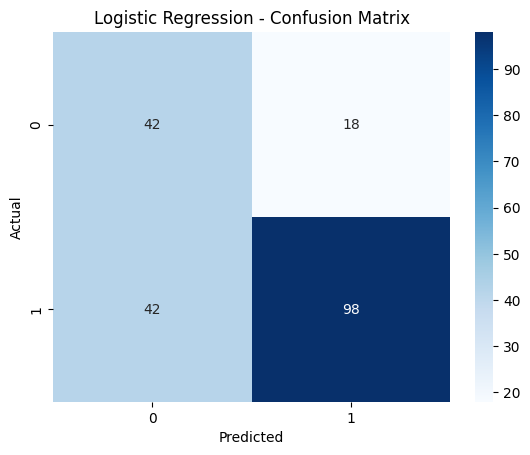

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)

print("Logistic Regression training completed")
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess test data
X_test_processed = preprocessor.transform(X_test)

# Predictions
y_pred = log_reg.predict(X_test_processed)
y_prob = log_reg.predict_proba(X_test_processed)[:, 1]

# Metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=6,
    random_state=42
)

dt.fit(X_train_resampled, y_train_resampled)
print("Decision Tree training completed")
y_pred_dt = dt.predict(X_test_processed)
y_prob_dt = dt.predict_proba(X_test_processed)[:, 1]

print("Decision Tree Results")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1 Score :", f1_score(y_test, y_pred_dt))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_dt))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))


Decision Tree training completed
Decision Tree Results
Accuracy : 0.63
Precision: 0.8113207547169812
Recall   : 0.6142857142857143
F1 Score : 0.6991869918699187
ROC AUC  : 0.6768452380952382

Classification Report:

              precision    recall  f1-score   support

           0       0.43      0.67      0.52        60
           1       0.81      0.61      0.70       140

    accuracy                           0.63       200
   macro avg       0.62      0.64      0.61       200
weighted avg       0.70      0.63      0.65       200



In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_resampled, y_train_resampled)
print("Random Forest training completed")
y_pred_rf = rf.predict(X_test_processed)
y_prob_rf = rf.predict_proba(X_test_processed)[:, 1]

print("Random Forest Results")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_rf))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest training completed
Random Forest Results
Accuracy : 0.75
Precision: 0.8082191780821918
Recall   : 0.8428571428571429
F1 Score : 0.8251748251748252
ROC AUC  : 0.7883333333333333

Classification Report:

              precision    recall  f1-score   support

           0       0.59      0.53      0.56        60
           1       0.81      0.84      0.83       140

    accuracy                           0.75       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.74      0.75      0.75       200



In [11]:
import os

folders = [
    "Credit-Scoring-Model/data",
    "Credit-Scoring-Model/notebooks",
    "Credit-Scoring-Model/src",
    "Credit-Scoring-Model/models"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("Project folders created")


Project folders created


In [12]:
df.to_csv("Credit-Scoring-Model/data/german_credit.csv", index=False)
print("Dataset saved")


Dataset saved


In [13]:
import joblib

joblib.dump(rf, "Credit-Scoring-Model/models/random_forest.pkl")
joblib.dump(preprocessor, "Credit-Scoring-Model/models/preprocessor.pkl")

print("Model and preprocessor saved")


Model and preprocessor saved


In [16]:
!find Credit-Scoring-Model -maxdepth 2 -type f


Credit-Scoring-Model/models/random_forest.pkl
Credit-Scoring-Model/models/preprocessor.pkl
Credit-Scoring-Model/data/german_credit.csv


In [19]:
!ls Credit-Scoring-Model/notebooks
